# Analysis of max-min length ratio

In [108]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [109]:
# Traversal all midline files
DIR = "./data/midline"

files = os.listdir(DIR)
filenames = []

for file in files:
    if not os.path.isdir(file): 
        filenames.append(DIR + '/' + file)
        
filenames

['./data/midline/lengths_0hr_20uM_TTAP2_ngcampmov_30x4fps_50%intensity_exp3_a3.csv',
 './data/midline/lengths_0hr_Cafree+EGTA_ngcampmov_30x4fps_50%intensity_exp2_a1.csv',
 './data/midline/lengths_0hr_Control_ngcampmov_30x4fps_50%intensity_exp3_a3.csv',
 './data/midline/lengths_10uM_nifedipine-EGCaMP_exp2_a2_25x10fps_5%_30mins.csv',
 './data/midline/lengths_Control-EGCaMP_exp1_a1_30x10fps_5%.csv',
 './data/midline/lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins.csv',
 './data/midline/lengths_Ctrl-NGCaMP6-40x-1x1-4fps-30mins.avi (gray rendering)(40fpsplaybackt.csv',
 './data/midline/lengths_EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.csv',
 './data/midline/lengths_john-long-cycles_grayscale.csv',
 './data/midline/lengths_NGCaMP6_50X_20fps_M1_001_R1.csv',
 './data/midline/lengths_peduncle_0hour_40x_4fps_ex3_002.csv',
 './data/midline/lengths_Peduncle_0hour_50x_4fps_exp4.csv',
 './data/midline/lengths_PreBisectROIs.csv',
 './data/midline/lengths_Pre_Bisect_40x_4fps_ex4.csv']

In [110]:
# Check the minimum and maximum lengths

minmaxlens = []

for filename in filenames:
    data = pd.read_csv(filename, header=0).values
    minlen = np.min(data)
    maxlen = np.max(data)
    minmaxlens.append([minlen, maxlen])
    
minmaxlens

[[83.6264438400962, 327.5221708297116],
 [121.84075960506769, 236.28006252670846],
 [79.56598129599976, 232.27557875200563],
 [62.72183096869618, 305.21060261522604],
 [69.44427129457439, 227.27302866648705],
 [61.43514376638549, 244.93206858996436],
 [272.34354259705225, 1415.4382872925526],
 [74.1131502443, 381.123489224],
 [140.711673689765, 397.8086613519654],
 [122.34216335010001, 405.95214372879997],
 [105.9544932103, 313.5371579938],
 [78.77344228366252, 295.2328177164266],
 [91.4371767802, 429.59451712059996],
 [68.8821477851, 384.3527113092]]

In [113]:
# Calc the ratios
ratios = []

for minmaxlen in minmaxlens:
    ratios.append(minmaxlen[1]/minmaxlen[0])
    
for ratio in ratios:
    print(round(ratio, 2))
    
print('\nmedian= {:.2f}'.format(np.median(ratios)), '\nmean= {:.2f}'.format(np.mean(ratios)), '\nmin= {:.2f}'.format(np.min(ratios)), '\nmax= {:.2f}'.format(np.max(ratios)))

3.92
1.94
2.92
4.87
3.27
3.99
5.2
5.14
2.83
3.32
2.96
3.75
4.7
5.58

median= 3.83 
mean= 3.88 
min= 1.94 
max= 5.58


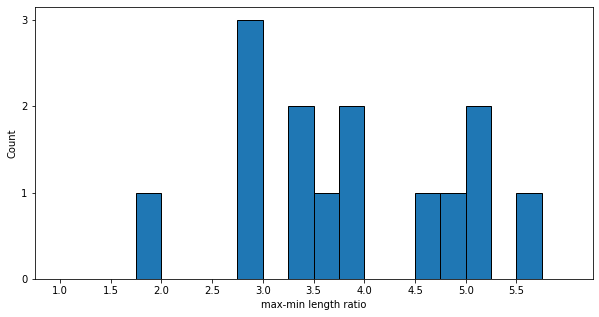

In [115]:
# Plot the histogram
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.hist(ratios, bins=20, range=(1, 6), edgecolor='k')
ax.set_xticks(np.arange(1, 6, 0.5))
ax.set_xlabel("max-min length ratio")
ax.set_ylabel("Count")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

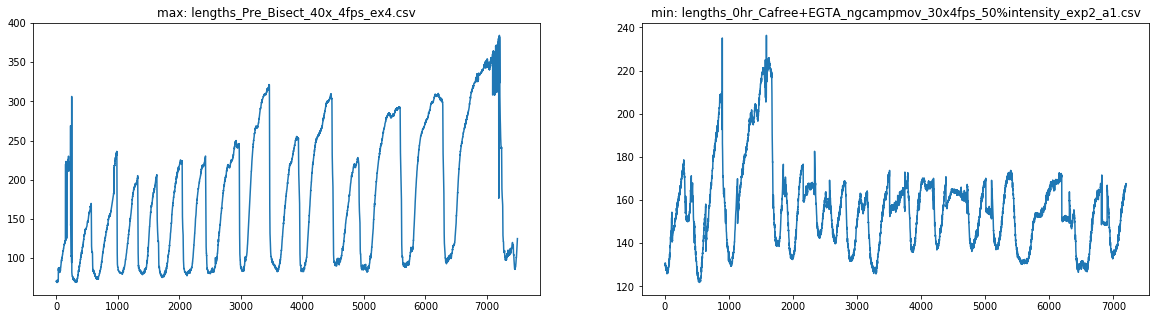

In [129]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(pd.read_csv(filenames[np.argmax(ratios)]))
ax1.set_title('max: ' + filenames[np.argmax(ratios)].split('/')[-1])
ax2.plot(pd.read_csv(filenames[np.argmin(ratios)]))
ax2.set_title('min: ' + filenames[np.argmin(ratios)].split('/')[-1])
plt.show()